In [1]:
using Distributions
using QuadGK
using StatsPlots
default(fmt=:png)

distname(dist) = replace(string(dist), r"{[^\}]*}"=>"")

function pdffunc_posterior(lik, prior)
    g(x) = exp(logpdf(lik, x) + logpdf(prior, x))
    Z = quadgk(g, -Inf, Inf)[1]
    f(x) = 1/Z * g(x)
    f
end

function gif_posterior(;
        likfunc = m -> Nornal(m, 1/4),
        prior = Normal())
    likstr = distname(likfunc(0))
    priorstr = distname(prior)
    
    ms = range(0, 7, 101)
    ms = [ms; reverse(ms)]

    x = range(-3, 9, 600)
    @gif for m in ms
        f = pdffunc_posterior(likfunc(m), prior)
        plot(x, x -> pdf(likfunc(m), x); label="likelihood")
        plot!(x, x -> pdf(prior, x); label="prior", ls=:dash)
        plot!(x, f; label="posterior", ls=:dashdot)
        plot!(ylim=(-0.05, 1.8))
        plot!(legend=:topleft)
        title!("likelihood(0)=$likstr,  prior=$priorstr")
        plot!(titlefontsize=10)
        plot!(size=(640, 320))
    end
end

gif_posterior (generic function with 1 method)

[ Info: Saved animation to D:\OneDrive\public\0044\tmp.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0044\\tmp.gif")
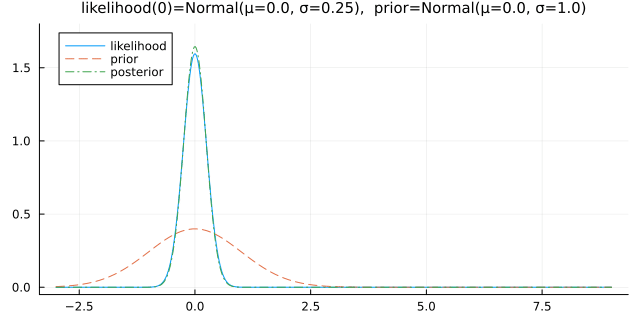

In [2]:
gif_posterior(likfunc = m -> Normal(m, 1/4), prior = Normal())

[ Info: Saved animation to D:\OneDrive\public\0044\tmp.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0044\\tmp.gif")
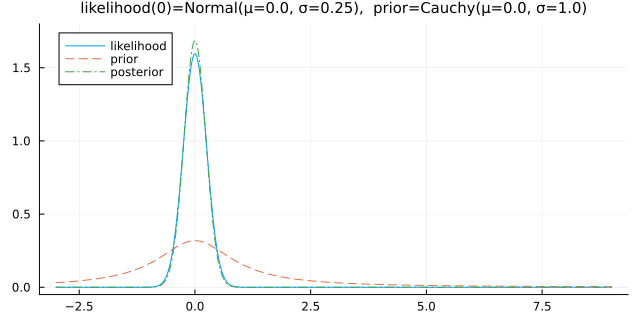

In [3]:
gif_posterior(likfunc = m -> Normal(m, 1/4), prior = Cauchy())

[ Info: Saved animation to D:\OneDrive\public\0044\tmp.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0044\\tmp.gif")
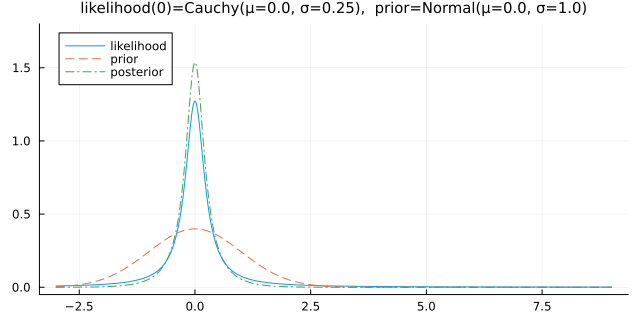

In [4]:
gif_posterior(likfunc = m -> Cauchy(m, 1/4), prior = Normal())

[ Info: Saved animation to D:\OneDrive\public\0044\tmp.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0044\\tmp.gif")
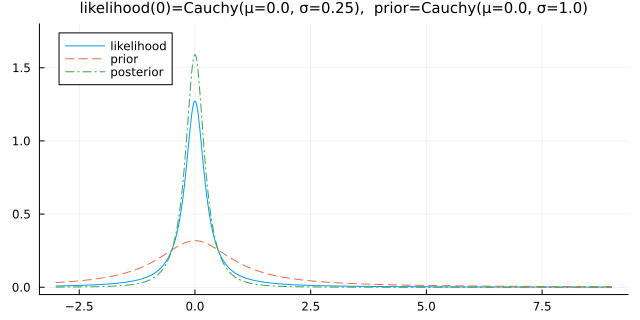

In [5]:
gif_posterior(likfunc = m -> Cauchy(m, 1/4), prior = Cauchy())